In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#carregar o arquivo input_data.py
import input_data
mnist = input_data.read_data_sets('./mnist/', one_hot = True)

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


In [2]:
tf.reset_default_graph()

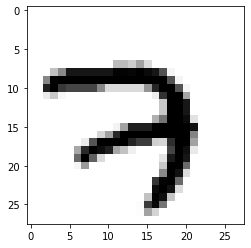

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
#usando o matplotlib para exibir a imagem #gray/Greys
plt.imshow(mnist.train.images[0].reshape(28,28), cmap = 'Greys')

In [4]:
#Demonstração dos pixes da imagem no dataset, usando os pixels a rede vai aprender como gerar
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

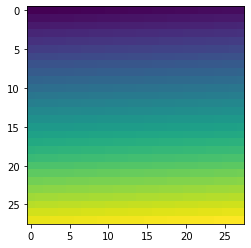

In [5]:
#exemplo de geração de dados aleatórios
import numpy as np
imagem1 = np.arange(0,784).reshape(28,28)#variável que vai regeber quantidade de numeros de 0 a 784
#imagem1
plt.imshow(imagem1)#imagens são linhas e colunas

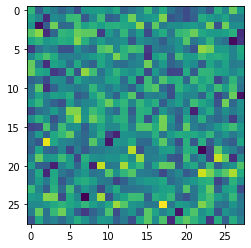

In [6]:
#simulando geração de uma imagem com numeros aleatórios 
imagem2 = np.random.normal(size = 784).reshape(28,28)
#imagem2 #visualização do array
plt.imshow(imagem2)#visualização da imagem

In [7]:
#gerador de numeros aleatórios(ruidos)
ruido_ph = tf.placeholder(tf.float32, [None, 100])#numero de entradas da rede neural é de 100 Entradas/imagens de 28x28 é um valor adequado

In [8]:
#criando o gerador (que vai receber o ruido)
def gerador(ruido, reuse = None):
    with tf.variable_scope('gerador', reuse = reuse): #define o escopo para o reuse
        # Neuronios 100(CE) -> 128(CO) -> 128(CO) -> 784(CS)(tamanho 28x28)
        camada_oculta1 = tf.nn.relu(tf.layers.dense(inputs = ruido, units = 128))#ligação camada oculta 01 com entrada
        camada_oculta2 = tf.nn.relu(tf.layers.dense(inputs = camada_oculta1, units = 128))#ligação camada oculta 01 com camada oculta 02
        camada_saida = tf.layers.dense(inputs = camada_oculta2, units = 784, activation = tf.nn.tanh)#ligação camada oculta 02 com saida
        return camada_saida

In [9]:
#entradas das imagens reais, lembrar que a camada de inicial terá 784 entradas
imagens_reais_ph = tf.placeholder(tf.float32, [None, 784])

In [10]:
#Criando o discriminador que determinara se a imagem gerada é um dígito ou não
def discriminador(X, reuse = None):
    with tf.variable_scope('discriminador', reuse = reuse):
        # Neuronios 784(CE) -> 128(CO) -> 128(CO2) -> 1(CS)
        camada_oculta1 = tf.nn.relu(tf.layers.dense(inputs = X, units = 128))#ligação camada Entrada com a camada oculta 01
        camada_oculta2 = tf.nn.relu(tf.layers.dense(inputs = camada_oculta1, units = 128))#ligação camada oculta 01 com a 02
        logits = tf.layers.dense(camada_oculta2, units = 1) #Ligação da camada oculta 2 com a saída 
        return logits

In [11]:
#formulação do treinamento
logits_imagens_reais = discriminador(imagens_reais_ph)#Passado as imagens Reais / chama o discriminador
logits_imagens_ruido = discriminador(gerador(ruido_ph), reuse = True)#Passando as imagens geradas / chama o gerador

#calculo do erro para a imagem real do discriminador
#executado o processo de smufing, para aproximar o valor ao máxido de 100%
erro_discriminador_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_imagens_reais,
                                                           labels = tf.ones_like(logits_imagens_reais) * (0.9)))
#calculo do erro para o ruido do discriminador
erro_discriminador_ruido = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_imagens_ruido,
                                                                  labels = tf.zeros_like(logits_imagens_ruido)))

#Calculo do erro total do discriminador
#na chamada do otimizados ele diminuira o valor das variáveis
erro_discriminador = erro_discriminador_real + erro_discriminador_ruido

#Calculo do erro para o gerador
#aqui é onde acontece o retorno da segunda rede neural para a primeira, treinando o gerador
erro_gerador = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_imagens_ruido,
                                                                  labels = tf.ones_like(logits_imagens_ruido)))


Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [12]:
#variáveis para o treinamento / variaves passiveis de otimização
variaveis = tf.trainable_variables()#variáveis passiveis de treinamento
variaveis 

[<tf.Variable 'discriminador/dense/kernel:0' shape=(784, 128) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_2/kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_2/bias:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense/kernel:0' shape=(100, 128) dtype=float32_ref>,
 <tf.Variable 'gerador/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_2/kernel:0' shape=(128, 784) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_2/bias:0' shape=(784,) dtype=float32_ref>]

In [13]:
#colocando todas as variáveis do discriminador em uma unica variável
variaveis_discriminador = [v for v in variaveis if 'discriminador' in v.name]#percore a lista e pega onde o name for igual a discriminador
print([v.name for v in variaveis_discriminador])#visualização da lista variáveis

['discriminador/dense/kernel:0', 'discriminador/dense/bias:0', 'discriminador/dense_1/kernel:0', 'discriminador/dense_1/bias:0', 'discriminador/dense_2/kernel:0', 'discriminador/dense_2/bias:0']


In [14]:
#colocando as variáveis do gerador em uma unica variável
variaveis_gerador = [v for v in variaveis if 'gerador' in v.name]
print([v.name for v in variaveis_gerador])

['gerador/dense/kernel:0', 'gerador/dense/bias:0', 'gerador/dense_1/kernel:0', 'gerador/dense_1/bias:0', 'gerador/dense_2/kernel:0', 'gerador/dense_2/bias:0']


In [15]:
#otimizadores

#otimizador para o Discriminador
treinamento_discriminador = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(erro_discriminador,
                                                                           var_list = variaveis_discriminador)

#otimizador para o gerador
treinamento_gerador = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(erro_gerador,
                                                                            var_list = variaveis_gerador)

In [16]:
########### TREINAMENTO #######

batch_size = 100 #quatidade de imagens para o treinamento
amostras_teste = [] #armazenar para ver o resultado dos treinamentos por época
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
      
        
    for epoca in range(1000):#definição de quantas épocas
        numero_batches = mnist.train.num_examples // batch_size #divisão do total de exemplos que tem pelo lote que vai ser utilizado
        for i in range(numero_batches):
            #imagens Reais
            batch = mnist.train.next_batch(batch_size)
            imagens_batch = batch[0].reshape((100, 784))
            imagens_batch = imagens_batch * 2 - 1 #Conversão das Imagens Batch
           
            #imagens com ruidos
            batch_ruido = np.random.uniform(-1, 1, size = (batch_size, 100))
            
            #treinamento Gerador
            _, custod = sess.run([treinamento_discriminador, erro_discriminador], 
                                 feed_dict = {imagens_reais_ph: imagens_batch, ruido_ph: batch_ruido})
            #treinamento Discriminador
            _, custog = sess.run([treinamento_gerador, erro_gerador], feed_dict = {ruido_ph: batch_ruido})
        
        #print dos resultados do treinamento
        print('época: ' + str(epoca + 1) + ' erro Discriminador: ' + str(custod) + ' erro Gerador: ' + str(custog))
        
        #teste / Vizualiza que imagem foi gerado atráves do ruido
        #a cada época é armazenado uma imagem
        ruido_teste = np.random.uniform(-1, 1, size = (1, 100))
        imagem_gerada = sess.run(gerador(ruido_ph, reuse = True), feed_dict = {ruido_ph: ruido_teste})
        amostras_teste.append(imagem_gerada)
            
            

época: 1 erro Discriminador: 0.43006265 erro Gerador: 4.6167903
época: 2 erro Discriminador: 1.446626 erro Gerador: 3.0857794
época: 3 erro Discriminador: 1.1103151 erro Gerador: 3.3726814
época: 4 erro Discriminador: 0.6501105 erro Gerador: 1.8763312
época: 5 erro Discriminador: 0.7508131 erro Gerador: 1.8280827
época: 6 erro Discriminador: 0.8645474 erro Gerador: 3.1130018
época: 7 erro Discriminador: 1.1108446 erro Gerador: 2.5651429
época: 8 erro Discriminador: 1.038634 erro Gerador: 2.83956
época: 9 erro Discriminador: 2.3562634 erro Gerador: 1.0769004
época: 10 erro Discriminador: 0.98630977 erro Gerador: 1.7046204
época: 11 erro Discriminador: 1.4555962 erro Gerador: 3.7043366
época: 12 erro Discriminador: 1.0752938 erro Gerador: 3.2787123
época: 13 erro Discriminador: 1.2672315 erro Gerador: 6.3496857
época: 14 erro Discriminador: 0.7538585 erro Gerador: 2.1172514
época: 15 erro Discriminador: 0.62941664 erro Gerador: 2.6843598
época: 16 erro Discriminador: 1.688505 erro Gerado

época: 130 erro Discriminador: 1.0954523 erro Gerador: 1.4088469
época: 131 erro Discriminador: 0.97208226 erro Gerador: 1.6976154
época: 132 erro Discriminador: 1.0987877 erro Gerador: 1.4280759
época: 133 erro Discriminador: 1.1606746 erro Gerador: 1.143464
época: 134 erro Discriminador: 1.3504074 erro Gerador: 1.261544
época: 135 erro Discriminador: 1.3433241 erro Gerador: 1.3514035
época: 136 erro Discriminador: 1.3766389 erro Gerador: 1.2878983
época: 137 erro Discriminador: 1.3834538 erro Gerador: 1.090659
época: 138 erro Discriminador: 1.1094013 erro Gerador: 1.1670655
época: 139 erro Discriminador: 1.230381 erro Gerador: 1.0721622
época: 140 erro Discriminador: 1.3210045 erro Gerador: 1.3333374
época: 141 erro Discriminador: 1.1893923 erro Gerador: 1.2428204
época: 142 erro Discriminador: 1.1006961 erro Gerador: 1.3241876
época: 143 erro Discriminador: 1.2239206 erro Gerador: 1.4911482
época: 144 erro Discriminador: 1.2231174 erro Gerador: 1.2999501
época: 145 erro Discriminado

época: 257 erro Discriminador: 1.1817887 erro Gerador: 1.0785178
época: 258 erro Discriminador: 1.2780659 erro Gerador: 1.1724173
época: 259 erro Discriminador: 1.2245976 erro Gerador: 1.1218345
época: 260 erro Discriminador: 1.2116599 erro Gerador: 1.0446994
época: 261 erro Discriminador: 1.1080306 erro Gerador: 1.308367
época: 262 erro Discriminador: 1.415467 erro Gerador: 1.28285
época: 263 erro Discriminador: 1.3098307 erro Gerador: 1.1215539
época: 264 erro Discriminador: 1.2189062 erro Gerador: 1.1320851
época: 265 erro Discriminador: 1.1287884 erro Gerador: 1.1408135
época: 266 erro Discriminador: 1.406682 erro Gerador: 1.0369902
época: 267 erro Discriminador: 1.2342298 erro Gerador: 1.1501709
época: 268 erro Discriminador: 1.0781797 erro Gerador: 1.4222223
época: 269 erro Discriminador: 1.1517321 erro Gerador: 1.2570933
época: 270 erro Discriminador: 1.2811348 erro Gerador: 1.0692987
época: 271 erro Discriminador: 1.2582773 erro Gerador: 1.4957427
época: 272 erro Discriminador:

época: 384 erro Discriminador: 1.1575131 erro Gerador: 1.322378
época: 385 erro Discriminador: 1.302185 erro Gerador: 0.9954802
época: 386 erro Discriminador: 1.1852503 erro Gerador: 1.2833782
época: 387 erro Discriminador: 1.3729227 erro Gerador: 0.979347
época: 388 erro Discriminador: 1.2504861 erro Gerador: 0.99168867
época: 389 erro Discriminador: 1.2380285 erro Gerador: 1.1392359
época: 390 erro Discriminador: 0.94670147 erro Gerador: 1.7700233
época: 391 erro Discriminador: 1.0777185 erro Gerador: 1.2192904
época: 392 erro Discriminador: 1.2775989 erro Gerador: 1.0062234
época: 393 erro Discriminador: 1.4248972 erro Gerador: 1.3804648
época: 394 erro Discriminador: 1.4294181 erro Gerador: 1.0528514
época: 395 erro Discriminador: 1.2063745 erro Gerador: 1.0619898
época: 396 erro Discriminador: 1.3409991 erro Gerador: 0.90846205
época: 397 erro Discriminador: 1.2978852 erro Gerador: 0.9844534
época: 398 erro Discriminador: 1.2283926 erro Gerador: 1.0730706
época: 399 erro Discrimin

época: 511 erro Discriminador: 1.344362 erro Gerador: 0.94076675
época: 512 erro Discriminador: 1.3676515 erro Gerador: 0.9936129
época: 513 erro Discriminador: 1.2825989 erro Gerador: 1.0720665
época: 514 erro Discriminador: 1.4498987 erro Gerador: 0.8383798
época: 515 erro Discriminador: 1.271242 erro Gerador: 1.0427914
época: 516 erro Discriminador: 1.2497308 erro Gerador: 1.916498
época: 517 erro Discriminador: 1.3530109 erro Gerador: 0.93318087
época: 518 erro Discriminador: 1.3679864 erro Gerador: 0.9462122
época: 519 erro Discriminador: 1.3446581 erro Gerador: 0.93967575
época: 520 erro Discriminador: 1.2970082 erro Gerador: 1.1604836
época: 521 erro Discriminador: 1.2603123 erro Gerador: 1.1788974
época: 522 erro Discriminador: 1.2403178 erro Gerador: 1.0136362
época: 523 erro Discriminador: 1.2344029 erro Gerador: 1.0554711
época: 524 erro Discriminador: 1.5296025 erro Gerador: 0.8164995
época: 525 erro Discriminador: 1.2923713 erro Gerador: 0.9371182
época: 526 erro Discrimin

época: 638 erro Discriminador: 1.3989351 erro Gerador: 0.8754509
época: 639 erro Discriminador: 1.3040934 erro Gerador: 0.971953
época: 640 erro Discriminador: 1.3262806 erro Gerador: 0.92308396
época: 641 erro Discriminador: 1.4157541 erro Gerador: 0.858457
época: 642 erro Discriminador: 1.230932 erro Gerador: 0.985981
época: 643 erro Discriminador: 1.2854803 erro Gerador: 1.030118
época: 644 erro Discriminador: 1.3365054 erro Gerador: 0.97262925
época: 645 erro Discriminador: 1.338923 erro Gerador: 1.0346586
época: 646 erro Discriminador: 1.3071865 erro Gerador: 0.90866715
época: 647 erro Discriminador: 1.4520473 erro Gerador: 0.8670796
época: 648 erro Discriminador: 1.2910441 erro Gerador: 0.9306496
época: 649 erro Discriminador: 1.1651019 erro Gerador: 1.6269437
época: 650 erro Discriminador: 1.32849 erro Gerador: 0.89476687
época: 651 erro Discriminador: 1.2635689 erro Gerador: 0.94491214
época: 652 erro Discriminador: 1.4230884 erro Gerador: 0.853619
época: 653 erro Discriminador

época: 764 erro Discriminador: 1.0521216 erro Gerador: 1.363292
época: 765 erro Discriminador: 1.2759293 erro Gerador: 0.9500026
época: 766 erro Discriminador: 1.4036169 erro Gerador: 0.8341451
época: 767 erro Discriminador: 1.4238744 erro Gerador: 0.8116408
época: 768 erro Discriminador: 1.3821251 erro Gerador: 0.8094717
época: 769 erro Discriminador: 1.4784545 erro Gerador: 0.7200429
época: 770 erro Discriminador: 1.3804688 erro Gerador: 1.2492499
época: 771 erro Discriminador: 1.3322494 erro Gerador: 1.0447193
época: 772 erro Discriminador: 1.2865548 erro Gerador: 0.8844305
época: 773 erro Discriminador: 1.2797651 erro Gerador: 0.8996091
época: 774 erro Discriminador: 1.3583872 erro Gerador: 0.89518905
época: 775 erro Discriminador: 1.2406685 erro Gerador: 0.9778515
época: 776 erro Discriminador: 1.2096035 erro Gerador: 1.0141889
época: 777 erro Discriminador: 1.2408278 erro Gerador: 0.99774826
época: 778 erro Discriminador: 1.4024804 erro Gerador: 0.77162653
época: 779 erro Discrim

época: 890 erro Discriminador: 1.2708641 erro Gerador: 0.9803305
época: 891 erro Discriminador: 1.4894475 erro Gerador: 0.8761454
época: 892 erro Discriminador: 1.3172617 erro Gerador: 0.85314566
época: 893 erro Discriminador: 1.3426075 erro Gerador: 0.8741871
época: 894 erro Discriminador: 1.1929462 erro Gerador: 0.99653625
época: 895 erro Discriminador: 1.4111723 erro Gerador: 0.7906827
época: 896 erro Discriminador: 1.4061801 erro Gerador: 0.8095207
época: 897 erro Discriminador: 1.39955 erro Gerador: 0.9220115
época: 898 erro Discriminador: 1.290689 erro Gerador: 0.8989769
época: 899 erro Discriminador: 1.3180277 erro Gerador: 0.9880909
época: 900 erro Discriminador: 1.5483792 erro Gerador: 0.9482135
época: 901 erro Discriminador: 1.4741147 erro Gerador: 1.4044495
época: 902 erro Discriminador: 1.4138865 erro Gerador: 0.8038776
época: 903 erro Discriminador: 1.2472086 erro Gerador: 0.9990699
época: 904 erro Discriminador: 1.293161 erro Gerador: 0.9327299
época: 905 erro Discriminad

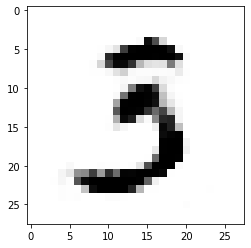

In [34]:
#Vizualizaçã do armazenamento das imagens geradas por época
plt.imshow(amostras_teste[700].reshape(28,28),cmap = 'Greys')
#plt.imshow(amostras_teste[999].reshape(28,28))